<a href="https://colab.research.google.com/github/shivendra680/Weed-Detection/blob/main/weeddeterction_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
import glob
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from keras.layers import concatenate
from keras.engine.training import optimizer
from sklearn.utils import shuffle
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [4]:
X  =[] 
Y = [] 
image_size = (227, 227)

for i in labels:
    Datasetspath = "/content/drive/MyDrive/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

/content/drive/MyDrive/dataset/broadleaf/
1191
/content/drive/MyDrive/dataset/grass/
3520
/content/drive/MyDrive/dataset/soil/
3249
/content/drive/MyDrive/dataset/soybean/
7376


In [5]:
for i in labels:
    Datasetspath ="/content/drive/MyDrive/dataset/"+i+"/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])

/content/drive/MyDrive/dataset/broadleaf/
/content/drive/MyDrive/dataset/broadleaf/1146.tif
/content/drive/MyDrive/dataset/grass/
/content/drive/MyDrive/dataset/grass/324.tif
/content/drive/MyDrive/dataset/soil/
/content/drive/MyDrive/dataset/soil/3016.tif
/content/drive/MyDrive/dataset/soybean/
/content/drive/MyDrive/dataset/soybean/6704.tif


In [6]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [8]:
X_train.shape, Y_train.shape

((10735, 227, 227, 3), (10735, 4))

In [9]:
X_test.shape, Y_test.shape

((4601, 227, 227, 3), (4601, 4))

In [9]:
model1 = Sequential([
Conv2D(20,kernel_size=(5,5), activation = 'relu', input_shape=(227,227,3)),
MaxPooling2D((2,2)),

Conv2D(30,kernel_size=(3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Conv2D(40,kernel_size=(3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Conv2D(50,kernel_size=(3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Conv2D(60,kernel_size=(3,3), activation = 'relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(128, activation = 'relu'),
Dense(4, activation = 'softmax')])

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 20)      1520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 30)      5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 40)        10840     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 40)       0

In [11]:
from keras.optimizers.legacy.adam import Adam
optimizer = Adam(learning_rate=0.0001)
model1.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [12]:
history = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 2, verbose = 1)

Epoch 1/10
5368/5368 [==============================] - 690s 128ms/step - loss: 0.5173 - accuracy: 0.8197 - val_loss: 0.4016 - val_accuracy: 0.8444
Epoch 2/10
5368/5368 [==============================] - 691s 129ms/step - loss: 0.2836 - accuracy: 0.8924 - val_loss: 0.2243 - val_accuracy: 0.9133
Epoch 3/10
5368/5368 [==============================] - 683s 127ms/step - loss: 0.2198 - accuracy: 0.9204 - val_loss: 0.1867 - val_accuracy: 0.9276
Epoch 4/10
5368/5368 [==============================] - 681s 127ms/step - loss: 0.1880 - accuracy: 0.9293 - val_loss: 0.1698 - val_accuracy: 0.9318
Epoch 5/10
5368/5368 [==============================] - 680s 127ms/step - loss: 0.1552 - accuracy: 0.9440 - val_loss: 0.1732 - val_accuracy: 0.9398
Epoch 6/10
5368/5368 [==============================] - 681s 127ms/step - loss: 0.1233 - accuracy: 0.9525 - val_loss: 0.1616 - val_accuracy: 0.9394
Epoch 7/10
5368/5368 [==============================] - 678s 126ms/step - loss: 0.1028 - accuracy: 0.9614 - val_

Model Accuracy



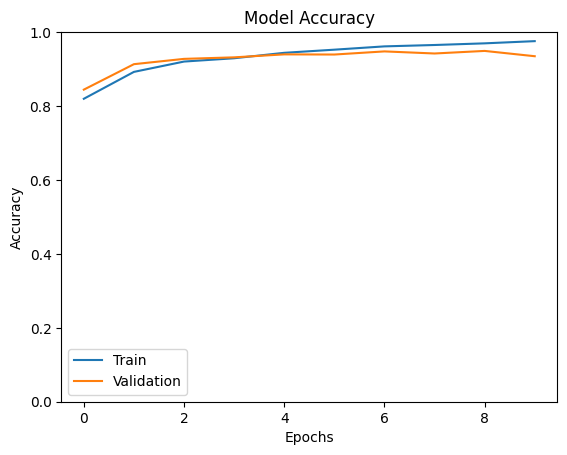

In [13]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



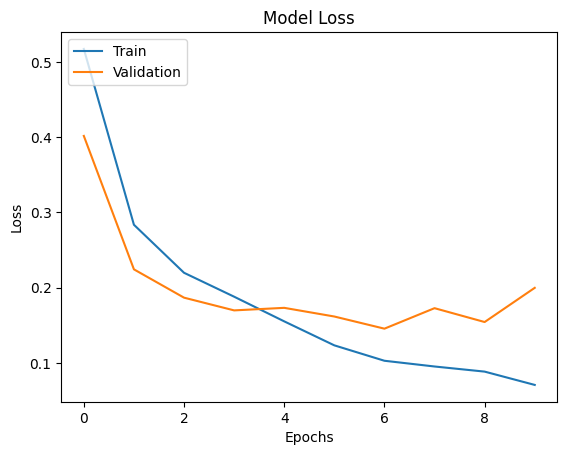

In [14]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
model2 = Sequential([
Conv2D(20,kernel_size=(5,5), activation = 'relu', dilation_rate=(3), input_shape=(227,227,3)),
MaxPooling2D((2,2)),

Conv2D(30,kernel_size=(3,3), activation = 'relu',dilation_rate=(2)),
MaxPooling2D((2,2)),

Conv2D(40,kernel_size=(3,3), activation = 'relu',dilation_rate=(2)),
MaxPooling2D((2,2)),

Conv2D(50,kernel_size=(3,3), activation = 'relu',dilation_rate=(1)),
MaxPooling2D((2,2)),

Conv2D(60,kernel_size=(3,3), activation = 'relu',dilation_rate=(1)),
MaxPooling2D((2,2)),
Flatten(),
Dense(128, activation = 'relu'),
Dense(4, activation = 'softmax')])

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 20)      1520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 103, 103, 30)      5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 40)        10840     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 40)       0

In [12]:
from keras.optimizers.legacy.adam import Adam
optimizer = Adam(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [13]:
history = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 2, verbose = 1)

Epoch 1/10
5368/5368 [==============================] - 681s 127ms/step - loss: 0.5839 - accuracy: 0.8010 - val_loss: 0.2675 - val_accuracy: 0.8883
Epoch 2/10
5368/5368 [==============================] - 680s 127ms/step - loss: 0.3278 - accuracy: 0.8728 - val_loss: 0.2526 - val_accuracy: 0.8868
Epoch 3/10
5368/5368 [==============================] - 679s 127ms/step - loss: 0.2664 - accuracy: 0.8968 - val_loss: 0.2235 - val_accuracy: 0.9111
Epoch 4/10
5368/5368 [==============================] - 677s 126ms/step - loss: 0.2302 - accuracy: 0.9121 - val_loss: 0.2198 - val_accuracy: 0.9174
Epoch 5/10
5368/5368 [==============================] - 677s 126ms/step - loss: 0.1935 - accuracy: 0.9240 - val_loss: 0.2010 - val_accuracy: 0.9278
Epoch 6/10
5368/5368 [==============================] - 734s 137ms/step - loss: 0.1743 - accuracy: 0.9362 - val_loss: 0.1888 - val_accuracy: 0.9296
Epoch 7/10
5368/5368 [==============================] - 677s 126ms/step - loss: 0.1421 - accuracy: 0.9470 - val_

Model Accuracy



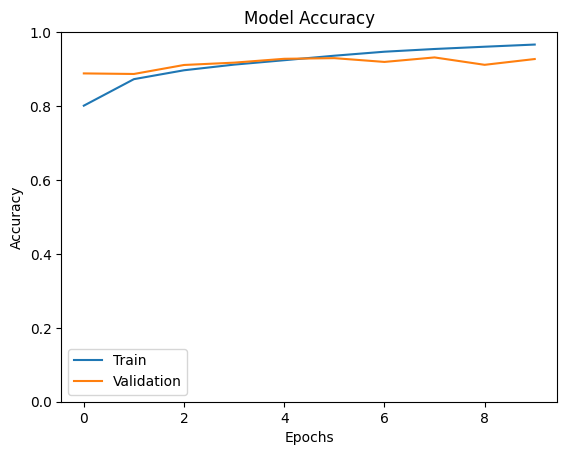

In [14]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



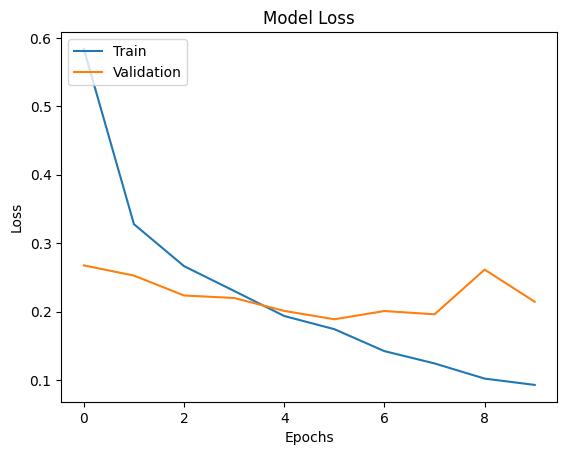

In [15]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()